In [ ]:
!pip install -U certifi

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\panse/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-4 torch 1.8.2 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [ ]:
model

In [ ]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.xyxy

In [ ]:
np.array(results.render()).shape

In [ ]:
img2 = 'https://videohive.img.customer.envatousercontent.com/files/810c70e7-c781-47b5-a84e-727cdce748ab/inline_image_preview.jpg?auto=compress%2Cformat&fit=crop&crop=top&max-h=8000&max-w=590&s=8b8a1c458b666f2e288d4abda16bc76a'
results2 = model(img2)
results2.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results2.render()))
plt.show()

# Real Time Detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make Detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Video Detection

In [ ]:
cap = cv2.VideoCapture('car_traffic.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make Detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Training from scratch

In [4]:
import uuid # unique identifier
import os 
import time

In [5]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()
        
        img_name = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        cv2.imwrite(img_name, frame)
        cv2.imshow ('Image Collection', frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [6]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
fatal: cannot change to 'C:\workspace\machine': No such file or directory
YOLOv5  2022-4-4 torch 1.8.2 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, s

# Load custom model

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\panse/.cache\torch\hub\master.zip
YOLOv5  2022-4-5 torch 1.8.2 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [8]:
img_myface = os.path.join('data', 'images', 'awake.b4c94958-b4b1-11ec-a0e1-001a7dda7113.jpg')

In [9]:
results_face = model(img_myface)

In [11]:
results_face.print()

image 1/1: 480x640 1 awake
Speed: 33.0ms pre-process, 339.3ms inference, 7.0ms NMS per image at shape (1, 3, 480, 640)


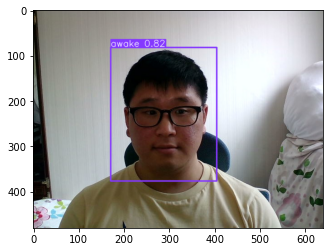

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results_face.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make Detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()